In [4]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from src.data import dataloader

In [5]:
# open config file
f = open("..//config//config.json",)
config = json.load(f)

traits = config["traits"] # 5 personality traits names 

In [2]:
# import personality data
personality_path = "..//data//Participants_Personality.xlsx"

data, _ = dataloader.extract_personality_data(path = personality_path)
data.drop('UserID', axis = 1, inplace = True)
data = data.astype(float)
data.head()

,Extroversion,Agreeableness,Conscientiousness,Emotional Stability,Openness
1,4.5,6.4,3.9,3.4,5.8
2,3.2,5.2,5.5,4.4,3.6
3,1.4,1.8,6.7,3.5,3.9
4,4.5,5.4,4.8,5.3,5.0
5,5.4,5.9,4.4,4.2,4.9


### Mean, median, standard deviation

In [11]:
# mean, median, standard deviation

for trait in traits:
    print(f"{trait} mean = {round(data[trait].mean(), 2)}")
    print(f"{trait} median = {round(data[trait].median(), 2)}")
    print(f"{trait} standard deviation = {round(data[trait].std(), 2)}")
    print("")

Agreeableness mean = 5.02
Agreeableness median = 5.05
Agreeableness standard deviation = 0.94

Extroversion mean = 4.06
Extroversion median = 3.9
Extroversion standard deviation = 0.98

Conscientiousness mean = 4.88
Conscientiousness median = 5.0
Conscientiousness standard deviation = 0.94

Emotional Stability mean = 4.38
Emotional Stability median = 4.5
Emotional Stability standard deviation = 0.85

Openness mean = 4.86
Openness median = 4.9
Openness standard deviation = 0.66



### Correlations

In [12]:
# spearman inter-correlations between traits

corr = data.corr(method='spearman')
corr

,Extroversion,Agreeableness,Conscientiousness,Emotional Stability,Openness
0,,,,,
Extroversion,1.000000,0.419192,0.090509,0.215396,0.125543
Agreeableness,0.419192,1.000000,0.339540,0.123031,0.229852
Conscientiousness,0.090509,0.339540,1.000000,0.348001,-0.004784
Emotional Stability,0.215396,0.123031,0.348001,1.000000,0.241044
Openness,0.125543,0.229852,-0.004784,0.241044,1.000000


In [13]:
# p-values for spearman correlations
# if p-value < 0.05 , the correlation is significant

pvalues = pd.DataFrame()  # matrix of p-values
for x in data.columns:
    for y in data.columns:
        corr = scipy.stats.spearmanr(data[x], data[y])
        pvalues.loc[x,y] = corr[1]

pvalues

# Correlated traits
# - Extraversion-Agreeableness
# - Agreeableness-Conscientiousness
# - Conscientiousness-Emotional Stability

,Extroversion,Agreeableness,Conscientiousness,Emotional Stability,Openness
Extroversion,0.000000,0.008802,0.588914,0.194033,0.452638
Agreeableness,0.008802,0.000000,0.037019,0.461801,0.165063
Conscientiousness,0.588914,0.037019,0.000000,0.032275,0.977257
Emotional Stability,0.194033,0.461801,0.032275,0.000000,0.144881
Openness,0.452638,0.165063,0.977257,0.144881,0.000000


### Normalcy test

In [14]:
# normalicy test: find if the traits distributions are normal

for trait in traits:
    stat, p = scipy.stats.shapiro(data[trait])
    print(f"Shapiro test statistics for trait {trait} = {stat}")
    print(f"P-value = {p}")
    if p > 0.05:
        print(f"The distribution for trait {trait} is normal")
    else:
        print(f"The distribution for trait {trait} is not normal")
    print("")

Shapiro test statistics for trait Agreeableness = 0.9474248290061951
P-value = 0.07325197756290436
The distribution for trait Agreeableness is normal

Shapiro test statistics for trait Extroversion = 0.9630628824234009
P-value = 0.23842790722846985
The distribution for trait Extroversion is normal

Shapiro test statistics for trait Conscientiousness = 0.9734917283058167
P-value = 0.49387025833129883
The distribution for trait Conscientiousness is normal

Shapiro test statistics for trait Emotional Stability = 0.9607047438621521
P-value = 0.20011679828166962
The distribution for trait Emotional Stability is normal

Shapiro test statistics for trait Openness = 0.9745600819587708
P-value = 0.5282766222953796
The distribution for trait Openness is normal



### Distributions

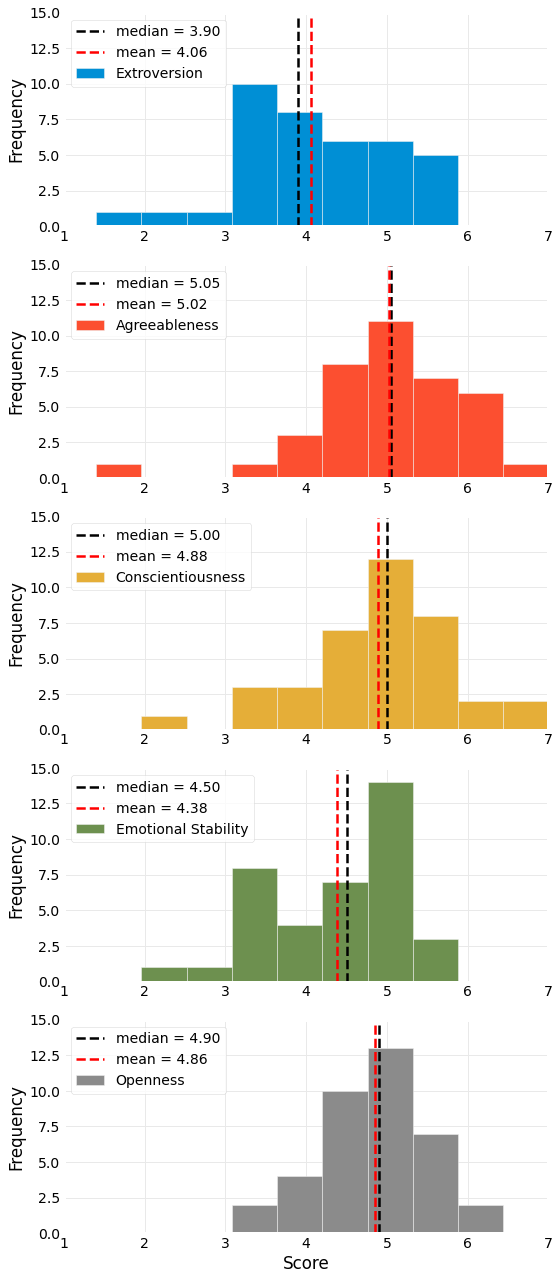

In [16]:
# MEAN - MEDIAN
import matplotlib
matplotlib.style.use('fivethirtyeight')

plt.rc('axes', facecolor='white') #graph background color
plt.rc('axes', edgecolor='white')
plt.rc('figure', facecolor='white') #figure background color
plt.rc('figure', edgecolor='white')
plt.rc('savefig', facecolor='white') #savefig background color
plt.rc('savefig', edgecolor='white')
plt.rc('grid', color='#e9e9e9')
ax = data.iloc[:,:].plot.hist(subplots=True, layout=(5,1), figsize=(8,18), grid=True, xlim=[1,7], ylim=[0,15], legend=True, edgecolor='#f2f2f2', sharex=False)

ax[0,0].axvline(data.Extroversion.median(), color = 'k', linestyle = 'dashed', linewidth = 2.5, label='median = 3.90')
ax[0,0].axvline(data.Extroversion.mean(), color = 'r', linestyle = 'dashed', linewidth = 2.5, label='mean = 4.06')
#ax[0,0].text(4.1, 11, str(round(data.Extroversion.mean(), ndigits=2)))
#ax[0,0].set_xlabel('Value')
ax[0,0].set_ylabel('Frequency')
ax[0,0].legend(loc="upper left")

ax[1,0].axvline(data.Agreeableness.median(), color='k', linestyle = 'dashed', linewidth = 2.5, label='median = 5.05')
ax[1,0].axvline(data.Agreeableness.mean(), color = 'r', linestyle = 'dashed', linewidth = 2.5, label='mean = 5.02')
#ax[1,0].text(5.25, 12.4, str(round(data.Agreeableness.mean(), ndigits=2)))
#ax[1,0].set_xlabel('Value')
#ax[1,0].set_ylabel('')
ax[1,0].set_ylabel('Frequency')
ax[1,0].legend(loc="upper left")

ax[2,0].axvline(data.Conscientiousness.median(), color = 'k', linestyle = 'dashed', linewidth = 2.5, label='median = 5.00')
ax[2,0].axvline(data.Conscientiousness.mean(), color = 'r', linestyle = 'dashed', linewidth = 2.5, label='mean = 4.88')
#ax[2,0].text(5.2, 12.6, str(round(data.Conscientiousness.mean(), ndigits=2)))
#ax[2,0].set_xlabel('Value')
ax[2,0].set_ylabel('Frequency')
ax[2,0].legend(loc="upper left")

ax[3,0].axvline(data["Emotional Stability"].median(), color = 'k', linestyle = 'dashed', linewidth = 2.5, label='median = 4.50')
ax[3,0].axvline(data["Emotional Stability"].mean(), color = 'r', linestyle = 'dashed', linewidth = 2.5, label='mean = 4.38')
#ax[3,0].text(3.95, 11, str(round(data["Emotional Stability"].mean(), ndigits=2)))
#ax[3,0].set_xlabel('Value')
#ax[3,0].set_ylabel('')
ax[3,0].set_ylabel('Frequency')
ax[3,0].legend(loc="upper left")

ax[4,0].axvline(data.Openness.median(), color = 'k', linestyle = 'dashed', linewidth = 2.5, label='median = 4.90')
ax[4,0].axvline(data.Openness.mean(), color = 'r', linestyle = 'dashed', linewidth = 2.5, label='mean = 4.86')
#ax[4,0].text(4.3, 11.5, str(round(data.Openness.mean(), ndigits=2)))
#ax[4,0].set_ylabel('')
ax[4,0].set_ylabel('Frequency')
ax[4,0].set_xlabel('Score')
ax[4,0].legend(loc="upper left")

plt.tight_layout()